# Week 9 - Supervised Learning 

<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

This week we will be applying some common supervised learning methods to classify the Iris dataset.
    
I have provided links to online tutorials for you learn how to use some basic scikit-learn classifiers by yourself. 
    
In the tutorial we will discuss how to assess the quality of models that you generate using the confusion matix and a number of metrics discussed in lectures.

</div>

## Classification Algorithms 

[Intro to Machine Learning](https://scikit-learn.org/stable/tutorial/basic/tutorial.html)

In general, a learning problem considers a set of n samples of data and then tries to predict properties of unknown data. If each sample is more than a single number and, for instance, a multi-dimensional entry (aka multivariate data), it is said to have several attributes or features.

Learning problems fall into a few categories:

- **Supervised learning**, in which the data comes with additional attributes that we want to predict [Click here to go to the scikit-learn supervised learning page](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning).This problem can be either:

 - **Classification**: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.
 - **Regression**: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

- **Unsupervised learning**, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization [Click here to go to the Scikit-Learn unsupervised learning page](https://scikit-learn.org/stable/unsupervised_learning.html#unsupervised-learning).



## Packages

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns

## Import the dataset
To learn about classifiers will will be making use of the **sklearn library**. This library has some awesome tutorials and example datasets. One such dataset is the **Iris dataset**. The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis*. 

The data set consists of 50 samples from each of **three species** of Iris (*Iris setosa, Iris virginica and Iris versicolor*). 

**Four features** were measured from each sample: the length and the width of the sepals and petals, in centimeters.

<img src="./media/irises.jpeg" width="500">

In [2]:
# Load in the dataset
from sklearn import datasets
iris = datasets.load_iris()
# print(iris.DESCR)

## Explore the data

In [3]:
# Let's unpack the data and associated labels
features = iris.feature_names
target_names = iris.target_names
petal_data = iris.data
labels = iris.target

print('feature names:\n', features)
print('\ntarget names:\n', target_names)
print('\nFirst 10 rows of data:\n', petal_data[:10])
print('\ntarget labels:', labels)

feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

target names:
 ['setosa' 'versicolor' 'virginica']

First 10 rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]

target labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


## Working with Numpy arrays

For this tutorial our petal data is stored as a 2 dimensional Numpy array.<br>
Each record in our dataset comprises measurements of petal length and width, and sepel length and width. These values are stored in a numpy array.

Unlike pandas DataFrames, Numpy ndarrays are *not necessarily* tabular data (ie possessing rows and columns).<br>
They can have an arbitrary number of dimensions, defined by the user. 

Some examples of data we can store using Numpy ndarrays:
- 1 dimensional array: A vector of length 10; shape=(10,)
- 2 dimensional array: Tabular data with 10 observations of 4 features; shape=(10,4)
- 3 dimensional array: An RGB color image of 256x256 pixels; shape=(3,256,256) (as we need a separate matrix for each color channel).

Numpy ndarrays are an efficient way to work with large multidimentional datasets. Let's explore how we can interact with them.

> Note <br>
> For more info on working with arrays and all the cool things they can do check out the Numpy docs or the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/02.02-the-basics-of-numpy-arrays.html).

**Data format**


In [5]:
# Run this cell to view how our data is stored. 
print(f'Dimensions: {petal_data.ndim}')
print(f'Shape: {petal_data.shape}')
print(f'Size: {petal_data.size}')

Dimensions: 2
Shape: (150, 4)
Size: 600


**Array indexing - access single elements**

In [6]:
# Accessing the first observation in our dataset (ie a row)
print(petal_data[0])

# Lower dims in our array can be accessed by chaining index calls
print(petal_data[0][1])

# Or by comma separated indexing of each dim
print(petal_data[0, 2])

[5.1 3.5 1.4 0.2]
3.5
1.4


**Slicing multidimentional arrays**

Numpy ndarray slicing syntax follows the conventions seen in base python. i.e. uses [start:stop:step] notation.<br>
We can slice each dimension of the array simultaneously using commas to separate the slices

In [7]:
# The first 5 observations
petal_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [8]:
# The first 2 values from each of the first 5 observations as a sub-array
petal_data[:5,:2]

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6]])

In [9]:
# The second column for the first five observations.
# This should be identical to the second column in the output of the cell above. 
# Note that the output is a 1D array (vector) this time rather than a 2D array! 
petal_data[:5, 1]

array([3.5, 3. , 3.2, 3.1, 3.6])

## Visualising the data

explained variance ratio (first two components): [0.92461872 0.05306648]


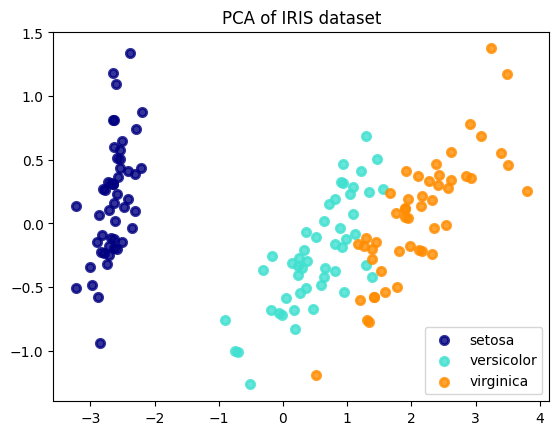

In [10]:
# We can perform a PCA to get a look at the data 
# perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(petal_data)
print(f'explained variance ratio (first two components): {str(pca.explained_variance_ratio_)}')

# plotting
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_pca[labels == i, 0], X_pca[labels == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')
plt.show()

# Classifying the data

**Using scikit-learn classifiers**

In this tutorial we will use Naive Bayes, KNN, SVM, and Decision Trees to build predictive models. <br>
We will use classifiers provided by scikit-learn (sklearn). <br>


> Note <br>
> If interested, a comparison of the sklearn models on the iris dataset can be seen [at this link.](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) 

Each classifier is a python class. To use a classifier we need to do the following:
- initialise the class, supplying any parameters the underlying model may need. 
- train the model using the .fit() function (supplying training data)
- predict new observations using the .predict() function (supplying test data)

The basic syntax is below. 

<div style='font-size: 13pt'>

```python
clf = Classifier(parameters)
clf.fit(trainingData, trainingLabels)
pred = clf.predict(testData)
```
</div>


**Training data and testing data**

Machine learning is about learning some properties of a data set and then testing those properties against another data set. A common practice in machine learning is to evaluate an algorithm by splitting a data set into two. We call one of those sets the **training set**, on which we learn some properties; we call the other set the **testing set**, on which we test the learned properties.


**Splitting the data**

To properly evaluate our model, we need to split the data into training and test sets.
The 'petal_data' is our data, and the 'labels' are each datapoint's class. 
Remember we want to guess (classify) a new iris flower to its correct label (iris flower type) given its petal data.

train_test_split will need to be given the petal_data, and the labels so it can split the data and labels in the same manner.
look up the [train_test_split documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to find how to do this.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

# Create training petal_data, training labels, test petal_data, test lables using train_test_split()
# In here, we used only half the data as training set. In reality, we usually use around 70%-80%
data_train, data_test, label_train, label_test = train_test_split(petal_data, labels, test_size=0.5, random_state=2025)

print('\nPreview of training data:')
print(data_train[:10])
print('\nPreview of training labels:')
print(label_train[:10])
print('\nPreview of test data:')
print(data_test[:10])
print('\nPreview of test labels:')
print(label_test[:10])


Preview of training data:
[[6.  3.  4.8 1.8]
 [5.8 2.7 3.9 1.2]
 [6.7 3.1 4.7 1.5]
 [6.3 2.5 5.  1.9]
 [6.6 3.  4.4 1.4]
 [4.4 3.  1.3 0.2]
 [5.2 3.4 1.4 0.2]
 [6.2 2.2 4.5 1.5]
 [6.7 3.3 5.7 2.5]
 [7.4 2.8 6.1 1.9]]

Preview of training labels:
[2 1 1 2 1 0 0 1 2 2]

Preview of test data:
[[4.7 3.2 1.3 0.2]
 [6.2 3.4 5.4 2.3]
 [6.8 3.  5.5 2.1]
 [6.4 2.8 5.6 2.2]
 [5.1 3.5 1.4 0.2]
 [5.7 2.5 5.  2. ]
 [4.9 3.1 1.5 0.2]
 [6.4 3.2 4.5 1.5]
 [7.7 3.  6.1 2.3]
 [5.4 3.9 1.7 0.4]]

Preview of test labels:
[0 2 2 2 0 2 0 1 2 0]


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

### Naive Bayes

<b>Material:</b> Scikit-learn implementation of [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html).
    
<b>Challenge:</b> Use the .fit() and .predict() functions on the initialised classifier to train the model and predict new observations. 
    
</div>



In [13]:
# our classifier class
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

# fitting the model & predicting test data.
# assign the predicted labels to a variable named pred_NB.
### YOUR CODE HERE
clf.fit(data_train, label_train)
pred_NB = clf.predict(data_test)

print('\ntrue:', label_test)
print('\npred:', pred_NB)
print("\nNumber of mislabeled points out of a total %d points : %d" % (data_test.shape[0], (label_test != pred_NB).sum()))


true: [0 2 2 2 0 2 0 1 2 0 2 1 0 2 0 0 0 0 1 2 0 1 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 1 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

pred: [0 2 2 2 0 2 0 1 2 0 2 2 0 2 0 0 0 0 1 2 0 2 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 2 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

Number of mislabeled points out of a total 75 points : 3



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

### K Nearest Neighbours

<b>Material:</b> Sample usage of [Nearest Neighbors classification](https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py) plotting decision boundaries
    
<b>Challenge:</b> Use the .fit() and .predict() functions on the initialised classifier to train the model and predict new observations. 
    
</div>

In [16]:
# our classifier class
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=15, weights='uniform')

# fitting the model & predicting test data.
# assign the predicted labels to a variable named pred_KNN.
### YOUR CODE HERE
clf.fit(data_train, label_train)
pred_KNN = clf.predict(data_test)

print('\ntrue:', label_test)
print('\npred:', pred_KNN)
print("\nNumber of mislabeled points out of a total %d points : %d" % (data_test.shape[0], (label_test != pred_KNN).sum()))


true: [0 2 2 2 0 2 0 1 2 0 2 1 0 2 0 0 0 0 1 2 0 1 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 1 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

pred: [0 2 2 2 0 2 0 1 2 0 2 2 0 2 0 0 0 0 1 2 0 2 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 2 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

Number of mislabeled points out of a total 75 points : 3



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

### Support Vector Machine

<b>Material:</b> Comparison of different [linear SVM classifiers](https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html) on a 2D projection of the iris dataset. 

<b>Challenge:</b> Use the .fit() and .predict() functions on the initialised classifier to train the model and predict new observations. 

NOTE: The classifier below is set up to use basic linear SVM. <br>
Scikit-learn additionally provides the SVC() class which can accept a kernel function.<br>
Provided kernels include 'poly', 'rbf', and 'sigmoid' which can be handy when the data is not linearly seperable.

</div>


In [17]:
# our classifier class
from sklearn.svm import LinearSVC
clf = LinearSVC()

# fitting the model & predicting test data.
# assign the predicted labels to a variable named pred_SVM.
### YOUR CODE HERE
clf.fit(data_train, label_train)
pred_SVM = clf.predict(data_test)

print('\ntrue:', label_test)
print('\npred:', pred_SVM)
print("\nNumber of mislabeled points out of a total %d points : %d" % (data_test.shape[0], (label_test != pred_SVM).sum()))


true: [0 2 2 2 0 2 0 1 2 0 2 1 0 2 0 0 0 0 1 2 0 1 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 1 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

pred: [0 2 2 2 0 2 0 1 2 0 2 2 0 2 0 0 0 0 1 2 0 2 0 0 0 1 0 2 2 2 2 2 1 1 2 1 1
 2 0 0 1 0 1 2 1 2 0 0 0 1 2 2 1 2 0 0 0 2 1 0 0 1 1 2 2 1 0 1 2 1 2 1 0 1
 1]

Number of mislabeled points out of a total 75 points : 5



<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

### Decision Trees

<b>Material:</b> Usage of the scikit-learn [Decision Tree Classifier](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

<b>Challenge:</b> Use the .fit() and .predict() functions on the initialised classifier to train the model and predict new observations. 

</div>



true: [0 2 2 2 0 2 0 1 2 0 2 1 0 2 0 0 0 0 1 2 0 1 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 1 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

pred: [0 2 2 2 0 2 0 1 2 0 2 2 0 2 0 0 0 0 1 2 0 2 0 0 0 1 0 2 2 2 2 2 1 1 2 1 2
 2 0 0 1 0 1 1 1 2 0 0 0 1 2 2 2 2 0 0 0 2 1 0 0 1 1 2 1 1 0 1 2 1 2 1 0 1
 1]

Number of mislabeled points out of a total 75 points : 3

Feature names ---
x[0]: sepal length (cm)
x[1]: sepal width (cm)
x[2]: petal length (cm)
x[3]: petal width (cm)

Label names ---
['setosa' 'versicolor' 'virginica']


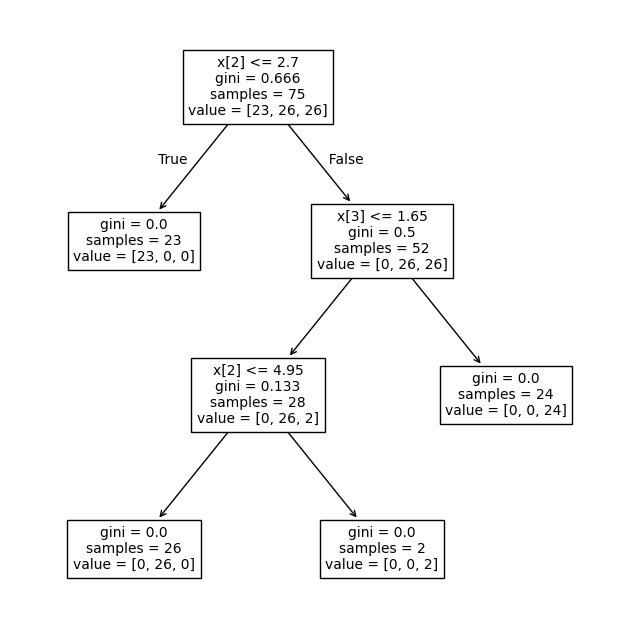

In [18]:
# our classifier class
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier()

# fitting the model & predicting test data.
# assign the predicted labels to a variable named pred_DT.
### YOUR CODE HERE
clf.fit(data_train, label_train)
pred_DT = clf.predict(data_test)

print('\ntrue:', label_test)
print('\npred:', pred_DT)
print("\nNumber of mislabeled points out of a total {} points : {}".format(data_test.shape[0], (label_test != pred_DT).sum()))

# visualising our trained decision tree
print('\nFeature names ---')
for i, field in enumerate(features):
    print(f'x[{i}]: {field}')
print('\nLabel names ---')
print(target_names)

fig, ax = plt.subplots(figsize=(8, 8))
plot_tree(clf, ax=ax, fontsize=10)
plt.show()

# Assessing Models

**Graph Confusion Matrix Generation**

By definition a confusion matrix $C$ is such that $C_ij$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

Which is fancy jargon for this guy: 

<img src="./media/CM.png" width="400">

Which we can use to derive information about how well our classifiers performed

<img src="./media/errorTypes.png" width="400">

For example, lets say we have used one of the classifiers listed above on our training data and now we will asses how well it did by testing it on a separate dataset with 10 samples which results in the following confusion matrix: 

<img src="./media/CM2.png" width="400">


**Making the confusion matrix with Python**

In python, you can code this with the following: 

In [19]:
from sklearn.metrics import confusion_matrix
y_true = ['T', 'T', 'T', 'T', 'F', 'F', 'F', 'F', 'F', 'F']
y_pred = ['T', 'T', 'T', 'F', 'T', 'T', 'F', 'F', 'F', 'F']
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() 
# Note: the ravel() function flattens a multidimensional array into a single flat array. 
print(f'tn: {tn}\nfp: {fp}\nfn: {fn}\ntp: {tp}')

tn: 4
fp: 2
fn: 1
tp: 3


**Confusion matrix for multiple classes**

For our data, there are 3 classes. How do we calculate these statistics?<br>
We calculate each statistic for a single class. <br>
For example, we would find TP, TN, FP, FP for iris setova. Then we would do the same for iris virginica etc.

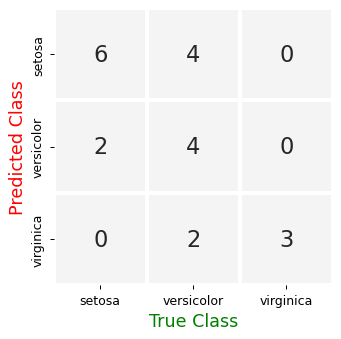

In [20]:
y_true = [1, 0, 0, 0, 2, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 0, 2, 0, 1]
y_pred = [0, 0, 0, 1, 2, 1, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 1, 1, 1, 0, 1]

cmatrix = confusion_matrix(y_true, y_pred)
conf_labels = ['setosa', 'versicolor', 'virginica']
df = pd.DataFrame(data=cmatrix, index=conf_labels, columns=conf_labels)

fig, ax = plt.subplots(dpi=90, figsize=(4,4))
sns.heatmap(df, linewidth=3, cmap='Greys', annot=True, annot_kws={'size': 18}, robust=True, vmin=-100, vmax=1000, fmt="d", ax=ax, square=False, cbar=False)
plt.xlabel('True Class', c='green', size=14)
plt.ylabel('Predicted Class', c='red', size=14)
plt.show()

**Confusion Matrices for our models**

Run the following cell to compare the confusion matrices for our 4 classifiers.

Which type of iris flower is the hardest to predict? <br>
Which other type of iris flower is this most commonly misclassified as? 

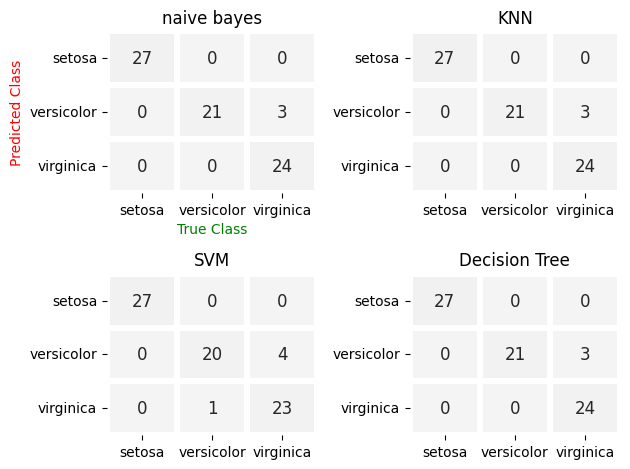

In [21]:
conf_labels = ['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows=2, ncols=2, dpi=100)

i = 0
for name, pred in zip(['naive bayes', 'KNN', 'SVM', 'Decision Tree'], [pred_NB, pred_KNN, pred_SVM, pred_DT]):
    nb_cm = confusion_matrix(label_test, pred)
    df = pd.DataFrame(data=nb_cm, index=conf_labels, columns=conf_labels)
    ax = axes[i//2, i%2]
    sns.heatmap(df, linewidth=3, cmap='Greys', robust=True, annot=True, annot_kws={'size': 12}, vmin=-100, vmax=1000, fmt="d", ax=ax, square=False, cbar=False)
    ax.set_title(name)
    if i == 0:
        ax.set_xlabel('True Class', c='green', size=10)
        ax.set_ylabel('Predicted Class', c='red', size=10)
    i += 1
plt.tight_layout()
plt.show()

## Model Metrics

In our PCA projection of the Iris dataset we saw some overlap between *I. virginica* and *I. versicolor*. We might expect our classifiers to struggle with these samples. 

In this section we will be assessing how the Naive Bayes model performed on classifying samples with the true label **versicolor**.

In [22]:
# First lets generate and print the array representing the Naive Bayes confusion matrix:
nb_cm = confusion_matrix(label_test, pred_NB)
print(nb_cm)

# We can extract the values we will need for versicolor like so
tp = nb_cm[1,1]
fn = nb_cm[2,1] + nb_cm[0,1]
fp = nb_cm[1,2] + nb_cm[1,0]
tn = nb_cm[0,0] + nb_cm[0,2] + nb_cm[2,0] + nb_cm[2,2] 

[[27  0  0]
 [ 0 21  3]
 [ 0  0 24]]


**Accuracy**

<div style="color: rgb(0,96,100); background: rgb(178,235,242); border: solid 1px rgb(77,208,225); padding: 10px;">

**How often is the classifier correct?**
    
Accuracy is the number of correct predictions made by the model over all predictions made. 

Accuracy is calculated as:<br><br>


$$
ACC = \frac{TP + TN}{TP + TN + FP + FN}
$$


<br>

Given the above equation, what is the **accuracy** of our classifier?
    
</div>

In [25]:
# Calculate and print Accuracy statistic using the formula above and pre-calculated tn, fp, fn, tp variables
#tn, fp, fn, tp 

### YOUR CODE HERE
acc = (tp + tn) / (tp + tn + fp + fn)

print(f'Accuracy: {acc}')

Accuracy: 0.96


**Precision**

<div style="color: rgb(0,96,100); background: rgb(178,235,242); border: solid 1px rgb(77,208,225); padding: 10px;">

**When it predicts the positive result, how often is it correct?**

Precision is the proportion of predicted positives that truly are positives

$$
PPV = \frac{TP}{TP + FP}
$$

Given the above equation, what is the precision of our classifier?
</div>

In [26]:
# Calculate and print Precision statistic using the formula above and pre-calculated tn, fp, fn, tp variables

### YOUR CODE HERE
precision = tp / (tp + fp)

print(f'Precision: {precision}')

Precision: 0.875


**Recall (True Positive Rate)**

<div style="color: rgb(0,96,100); background: rgb(178,235,242); border: solid 1px rgb(77,208,225); padding: 10px;">

**When it is actually the positive result, how often does it predict correctly?**
    
Recall is the proportion of actual positives that are correctly classified<br>

$$
TPR = \frac{TP}{TP + FN}
$$

Given the above equation, what is the recall of our classifier?
</div>

In [27]:
# Calculate and print Recall statistic using the formula above and pre-calculated tn, fp, fn, tp variables

### YOUR CODE HERE
recall = tp / (tp + fn)

print(f'Recall: {recall}')

Recall: 1.0


**False Positive Rate**
<div style="color: rgb(0,96,100); background: rgb(178,235,242); border: solid 1px rgb(77,208,225); padding: 10px;">

**When it predicts a positive result, how often is it incorrect?**

$FPR = \frac{FP}{FP + TN}$

Given the above equation, what is the FPR of our classifier?
</div>

In [28]:
# Calculate and print FPR using the formula above and pre-calculated tn, fp, fn, tp variables

### YOUR CODE HERE
FPR = fp / (fp + tn)

print(f'False positive rate: {FPR}')

False positive rate: 0.05555555555555555


**F1 score**
<div style="color: rgb(0,96,100); background: rgb(178,235,242); border: solid 1px rgb(77,208,225); padding: 10px;">

**This is just the harmonic mean of precision and recall**
    
F1-score will penalise large discrepancies between precision and recall

$$
F_1 =  \frac{2*TP}{2*TP + FP + FN}
$$

Given the above equation, what is the F1 score of our classifier? 
</div>

In [29]:
# Calculate and print F1 using the formula above and pre-calculated tn, fp, fn, tp variables

### YOUR CODE HERE
f1 = 2 * tp / (2 * tp + fp + fn)

print(f'F1 score: {f1}')

F1 score: 0.9333333333333333


To view the results in a more comprehensive way, we can get the report using `classification_report` function.

In [30]:
# Hint at some helpful functions 
from sklearn.metrics import classification_report

clf = GaussianNB()
clf.fit(data_train, label_train)
pred_NB = clf.predict(data_test)
print(classification_report(pred_NB, label_test, target_names=conf_labels, digits=3))

              precision    recall  f1-score   support

      setosa      1.000     1.000     1.000        27
  versicolor      0.875     1.000     0.933        21
   virginica      1.000     0.889     0.941        27

    accuracy                          0.960        75
   macro avg      0.958     0.963     0.958        75
weighted avg      0.965     0.960     0.960        75



## Cross Validation

Cross-validation estimates generalization by repeatedly training on folds and testing on held-out data—helping model selection and overfitting control—but it is computationally costly and can be unreliable with small or dependent samples.

<img src="./media/Cross_Validation.png" width="600">


<div style="color: rgb(27,94,32); background: rgb(200,230,201); border: solid 1px rgb(129,199,132); padding: 10px;">

### 5-Fold Cross Validation

<b>Challenge:</b> Use the `cross_validate()` functions to perform 5-fold cross validation on the training dataset. Save the result into `cv_scores` variable.

</div>

In [33]:
from sklearn.model_selection import cross_validate

# Re-split the data into 80% training and 20% testing
data_train, data_test, label_train, label_test = train_test_split(petal_data, labels, test_size=0.2, random_state=2025)

# YOUR CODE HERE
score_metrics = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
# 10-fold cross validation
clf = GaussianNB()
cv_scores = cross_validate(clf, data_train, label_train, scoring=score_metrics, cv=5)

In [34]:
# Convert into pandas dataframe for better visualisation
df_scores = pd.DataFrame(cv_scores)
print(df_scores)
print()

# Cross validation scores:
cv_acc = np.mean(cv_scores['test_accuracy'])
cv_precision = np.mean(cv_scores['test_precision_macro'])
cv_recall = np.mean(cv_scores['test_recall_macro'])
cv_f1 = np.mean(cv_scores['test_f1_macro'])
print(f"5-Fold CV Results - Accuracy: {cv_acc:.4f}, Precision: {cv_precision:.4f}, Recall: {cv_recall:.4f}, F1: {cv_f1:.4f}")

   fit_time  score_time  test_accuracy  test_precision_macro  \
0  0.001041    0.004152       0.958333              0.962963   
1  0.000337    0.002248       1.000000              1.000000   
2  0.000283    0.002266       1.000000              1.000000   
3  0.000960    0.002496       0.875000              0.884259   
4  0.000696    0.002184       0.916667              0.939394   

   test_recall_macro  test_f1_macro  
0           0.962963       0.960784  
1           1.000000       1.000000  
2           1.000000       1.000000  
3           0.884259       0.882353  
4           0.904762       0.911111  

5-Fold CV Results - Accuracy: 0.9500, Precision: 0.9573, Recall: 0.9504, F1: 0.9508


**End of Week 9 Tutorial**